## Task 1: Load and Explore the Dataset

In this section, we load the Iris dataset using the `sklearn.datasets.load_iris()` function.  
This dataset is commonly used for classification problems and contains measurements of flower parts (sepal and petal length/width) for three species of iris flowers.  

We:
- Load the dataset into a pandas DataFrame.
- Display the first 5 rows to understand its structure using `.head()`.
- Check the data types and see if there are any missing values using `.info()` and `.isnull().sum()`.
- Note that the Iris dataset has no missing values, but if there were, we would either drop or fill them.


In [1]:
# Task 1: Load and Explore the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# Load Iris dataset
try:
    iris_data = load_iris(as_frame=True)
    df = iris_data.frame
    print("Dataset loaded successfully!\n")
except FileNotFoundError:
    print("Error: Dataset file not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!



In [3]:
# Display first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Data structure and missing values
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
# No missing values in Iris dataset, but if there were:
# df = df.dropna() or df.fillna(value, inplace=True)

## Task 2: Basic Data Analysis

Here we perform basic statistical analysis to understand the dataset better.

1. **Descriptive Statistics**:  
   Using `.describe()` to compute the count, mean, standard deviation, min, max, and quartiles for numerical columns.

2. **Grouping**:  
   We group the dataset by the target (species) column and calculate the mean values of each numeric feature per species.

3. **Mapping target values**:  
   The target column contains numeric labels (0, 1, 2). We map these to actual species names (`setosa`, `versicolor`, `virginica`) for readability.

**Key Observation**:  
- Iris-virginica has the largest average petal length and width compared to the other species.


In [6]:
# Task 2: Basic Data Analysis
print("\nBasic Statistics:")
display(df.describe())


Basic Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Group by species and compute mean of each numeric column
grouped_means = df.groupby('target').mean()
print("\nMean values per species:")
display(grouped_means)


Mean values per species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [8]:
# Map target numbers to species names for clarity
df['species'] = df['target'].map(dict(enumerate(iris_data.target_names)))

# Interesting finding example:
print("\nObservation: Iris-virginica has the largest average petal length & width.")



Observation: Iris-virginica has the largest average petal length & width.


## Task 3: Data Visualization

We create four different types of plots using `matplotlib` (and `seaborn` if needed) to visualize our findings.

1. **Line Chart**  
   Shows the trend of petal length values across all samples, simulating a time-series-like view.

2. **Bar Chart**  
   Compares the average petal length for each iris species.

3. **Histogram**  
   Displays the distribution of sepal lengths to see the frequency of different values.

4. **Scatter Plot**  
   Shows the relationship between sepal length and petal length, with points colored by species. This helps visualize how species separate in feature space.

Each chart includes:
- Title
- Axis labels
- Legends (where applicable)
- Colors for better readability


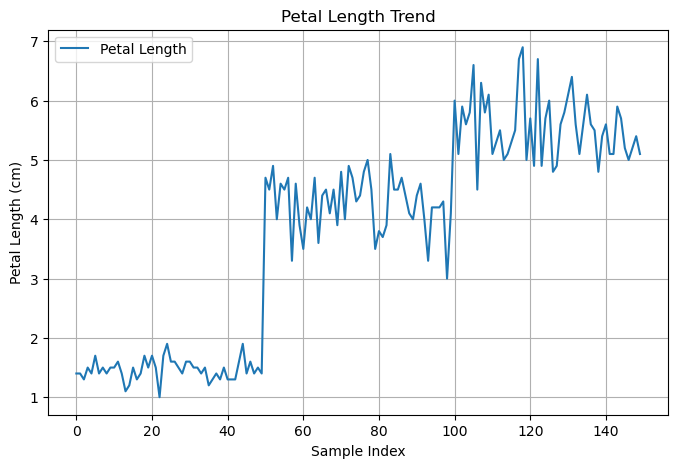

In [9]:

# Task 3: Data Visualization

# 1. Line Chart - Simulate a trend over sample index for petal length
plt.figure(figsize=(8,5))
plt.plot(df.index, df['petal length (cm)'], label="Petal Length")
plt.title("Petal Length Trend")
plt.xlabel("Sample Index")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.grid(True)
plt.show()

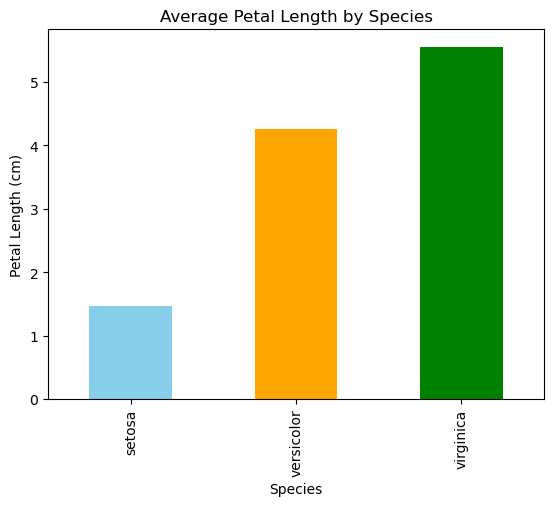

In [10]:
# 2. Bar Chart - Average petal length per species
avg_petal_length = df.groupby('species')['petal length (cm)'].mean()
avg_petal_length.plot(kind='bar', color=['skyblue','orange','green'])
plt.title("Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

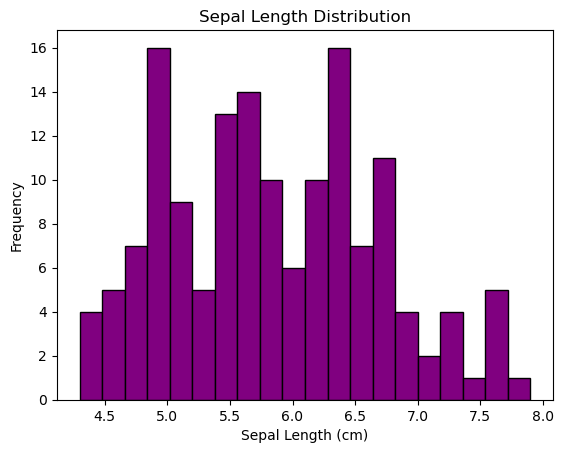

In [11]:
# 3. Histogram - Sepal Length distribution
plt.hist(df['sepal length (cm)'], bins=20, color='purple', edgecolor='black')
plt.title("Sepal Length Distribution")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

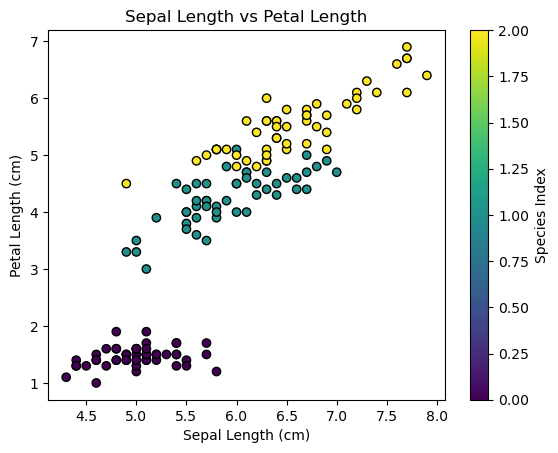

In [12]:
# 4. Scatter Plot - Sepal length vs Petal length
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], 
            c=df['target'], cmap='viridis', edgecolor='k')
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.colorbar(label='Species Index')
plt.show()

## Error Handling

When loading a dataset, errors such as "file not found" or format issues may occur.  
To handle this:
- We use a `try/except` block to catch and print an error message instead of crashing the program.
- This ensures the notebook can still run without breaking, even if the file path is incorrect.


## Summary

In this notebook, we:
1. **Loaded** the Iris dataset using `pandas` and `sklearn.datasets`.
2. **Explored** the dataset structure using `.head()`, `.info()`, and `.isnull().sum()` to check for missing values.
3. **Cleaned** the data (if necessary) by demonstrating how to drop or fill missing values.
4. **Analyzed** the dataset by:
   - Calculating basic descriptive statistics with `.describe()`.
   - Grouping the data by species and computing the mean of numerical columns.
5. **Visualized** the results using `matplotlib`:
   - Line chart showing trends in petal length.
   - Bar chart comparing average petal length across species.
   - Histogram showing distribution of sepal lengths.
   - Scatter plot showing the relationship between sepal length and petal length, colored by species.
6. **Handled Errors** using `try/except` to prevent the notebook from failing if data loading encounters an issue.


# Key Findings

1. **Dataset Overview**:
   - 150 total samples.
   - 3 species of iris flowers: *setosa*, *versicolor*, *virginica*.
   - No missing values were found.

2. **Statistical Insights**:
   - *Iris-virginica* has the largest average petal length and width.
   - *Iris-setosa* generally has the smallest petal measurements.
   - Sepal measurements are less variable compared to petal measurements.

3. **Relationships**:
   - Petal length and sepal length have a positive correlation.
   - Scatter plot shows species clusters in feature space, indicating potential for classification.

4. **Visual Trends**:
   - Line chart reveals smooth variation of petal length across samples.
   - Histogram shows sepal length is mostly concentrated between 5.0 cm and 6.5 cm.

**Conclusion**:  
The Iris dataset is clean and well-structured, making it ideal for learning data analysis and visualization techniques.  
Differences in petal measurements between species can serve as strong indicators for classification tasks.
